In [242]:
from pandas import read_csv
from datetime import datetime
# load data
dataset = read_csv('A_ticker.csv')
# manually specify column names
dataset.columns = ['Date','SellMaxPrice', 'SellMaxVolume','BuyMaxPrice', 'BuyMaxVolume', 'LastTransactionPrice', 'TransactionsVolume', 'MaxPrice', 'MinPrice']
dataset = dataset[dataset > 0]
dataset.index = dataset['Date']
dataset.drop('Date', axis=1, inplace=True)

# drop the first 24 hours
dataset = dataset[(24*12):]
# summarize first 5 rows
display(dataset.head(5))
# save to file
dataset.to_csv('A_ticker copy.csv')

,SellMaxPrice,SellMaxVolume,BuyMaxPrice,BuyMaxVolume,LastTransactionPrice,TransactionsVolume,MaxPrice,MinPrice
Date,,,,,,,,
1510642978,68.724731,63.417947,68.725798,19.076011,68.735402,28940.18870,71.951505,68.073828
1510643277,68.489979,85.317625,68.491046,49.556312,68.489979,29195.54506,71.951505,68.073828
1510643578,68.383274,61.833634,68.384341,65.991390,68.384341,29136.22305,71.951505,68.073828
1510643877,68.475041,17.368273,68.478242,34.252000,68.479309,29155.97901,71.951505,68.073828
1510644177,67.743041,29.258027,67.748376,63.272380,67.733437,29624.04333,71.951505,67.733437


In [243]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = read_csv('A_ticker copy.csv', header=0, index_col=0)
dataset = dataset[dataset>0]
values = dataset.values
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
n_5mins = 5 *12
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_5mins, 10)

# drop columns we don't want to predict
h = range(480,560)
k = [485,493,501,509,517,525,533,541,549,557]
reframed.drop(reframed.columns[[item for item in h if item not in k]], axis=1, inplace=True)

print("var6(t) is final price in t 5 minitues later")
display(reframed.head(5))

var6(t) is final price in t 5 minitues later


,var1(t-60),var2(t-60),var3(t-60),var4(t-60),var5(t-60),var6(t-60),var7(t-60),var8(t-60),var1(t-59),var2(t-59),...,var6(t),var6(t+1),var6(t+2),var6(t+3),var6(t+4),var6(t+5),var6(t+6),var6(t+7),var6(t+8),var6(t+9)
80,0.558804,0.013423,0.558804,0.002541,0.559100,0.109004,0.630506,0.660717,0.556245,0.019130,...,0.204717,0.204276,0.204614,0.205358,0.205073,0.204656,0.204585,0.204322,0.204264,0.205743
81,0.556245,0.019130,0.556245,0.006997,0.555639,0.109492,0.630506,0.660717,0.554318,0.018274,...,0.204276,0.204614,0.205358,0.205073,0.204656,0.204585,0.204322,0.204264,0.205743,0.206652
82,0.554318,0.018274,0.554318,0.006625,0.554586,0.109577,0.630506,0.660717,0.539564,0.021070,...,0.204614,0.205358,0.205073,0.204656,0.204585,0.204322,0.204264,0.205743,0.206652,0.207181
83,0.539564,0.021070,0.539564,0.023831,0.539660,0.117765,0.630506,0.646597,0.535951,0.093181,...,0.205358,0.205073,0.204656,0.204585,0.204322,0.204264,0.205743,0.206652,0.207181,0.207347
84,0.535951,0.093181,0.535951,0.009368,0.536230,0.129549,0.630506,0.633563,0.530381,0.033104,...,0.205073,0.204656,0.204585,0.204322,0.204264,0.205743,0.206652,0.207181,0.207347,0.208395


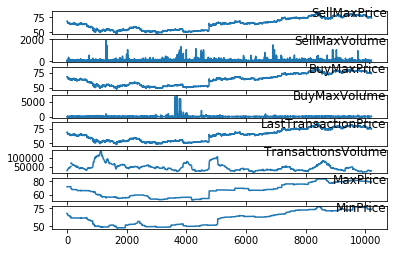

In [244]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('A_ticker copy.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,4, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [247]:
# split into train and test sets
from sklearn.model_selection import train_test_split
import pandas as pd

values = reframed.values
n_obs = n_5mins * n_features
outs = [[0] * 2] * 10
for i in range(10):
    # split into input and outputs
    Testtime = (int)(np.floor((1-0.1)*1498))
    Train = values[0:Testtime,:]
    Test  = values[Testtime:-1,:]
    #train_X, test_X, train_y, test_y = train_test_split(values[:,:n_obs], values[:,-(i+1)], test_size = 0.33, random_state = 42)
    train_X = Train[:,:n_obs]
    train_y = Train[:,-(i+1)]
    test_X = Test[:,:n_obs]
    test_y = Test[:,-(i+1)]
    outs[9-i]=[train_y,test_y]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_5mins, n_features))
test_X = test_X.reshape((test_X.shape[0], n_5mins, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    


(1348, 480) 1348 (1348,)
(1348, 60, 8) (1348,) (7539, 60, 8) (7539,)


Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 11s - loss: 0.1358 - val_loss: 0.2667
Epoch 2/50
 - 2s - loss: 0.1475 - val_loss: 0.0748
Epoch 3/50
 - 2s - loss: 0.0685 - val_loss: 0.0512
Epoch 4/50
 - 2s - loss: 0.0299 - val_loss: 0.0441
Epoch 5/50
 - 2s - loss: 0.0341 - val_loss: 0.0342
Epoch 6/50
 - 2s - loss: 0.0222 - val_loss: 0.0324
Epoch 7/50
 - 2s - loss: 0.0260 - val_loss: 0.0828
Epoch 8/50
 - 2s - loss: 0.0278 - val_loss: 0.0636
Epoch 9/50
 - 2s - loss: 0.0849 - val_loss: 0.1029
Epoch 10/50
 - 2s - loss: 0.0813 - val_loss: 0.2031
Epoch 11/50
 - 2s - loss: 0.0835 - val_loss: 0.0436
Epoch 12/50
 - 2s - loss: 0.0271 - val_loss: 0.0404
Epoch 13/50
 - 2s - loss: 0.0261 - val_loss: 0.0346
Epoch 14/50
 - 2s - loss: 0.0223 - val_loss: 0.0378
Epoch 15/50
 - 2s - loss: 0.0243 - val_loss: 0.0490
Epoch 16/50
 - 2s - loss: 0.0128 - val_loss: 0.0374
Epoch 17/50
 - 2s - loss: 0.0189 - val_loss: 0.0407
Epoch 18/50
 - 2s - loss: 0.0157 - val_loss: 0.0299
Epoch 19/50
 - 2s - loss

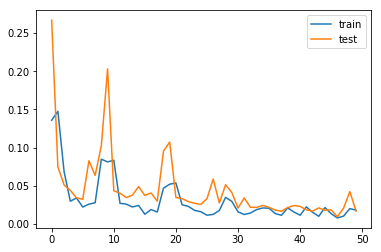

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 20s - loss: 0.2285 - val_loss: 0.2449
Epoch 2/50
 - 2s - loss: 0.1441 - val_loss: 0.0706
Epoch 3/50
 - 2s - loss: 0.0722 - val_loss: 0.0732
Epoch 4/50
 - 2s - loss: 0.0476 - val_loss: 0.0515
Epoch 5/50
 - 2s - loss: 0.0326 - val_loss: 0.0999
Epoch 6/50
 - 2s - loss: 0.0396 - val_loss: 0.0555
Epoch 7/50
 - 2s - loss: 0.0486 - val_loss: 0.0432
Epoch 8/50
 - 2s - loss: 0.0267 - val_loss: 0.0540
Epoch 9/50
 - 3s - loss: 0.0282 - val_loss: 0.0424
Epoch 10/50
 - 3s - loss: 0.0321 - val_loss: 0.0408
Epoch 11/50
 - 3s - loss: 0.0291 - val_loss: 0.0319
Epoch 12/50
 - 3s - loss: 0.0177 - val_loss: 0.0265
Epoch 13/50
 - 2s - loss: 0.0262 - val_loss: 0.0338
Epoch 14/50
 - 3s - loss: 0.0352 - val_loss: 0.0614
Epoch 15/50
 - 3s - loss: 0.0396 - val_loss: 0.0302
Epoch 16/50
 - 3s - loss: 0.0244 - val_loss: 0.0197
Epoch 17/50
 - 505s - loss: 0.0173 - val_loss: 0.0265
Epoch 18/50
 - 2s - loss: 0.0206 - val_loss: 0.0135
Epoch 19/50
 - 2s - lo

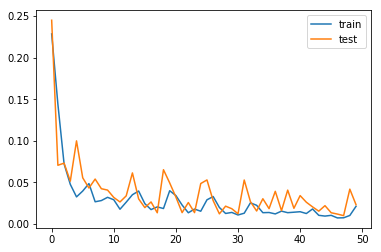

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 10s - loss: 0.1632 - val_loss: 0.3793
Epoch 2/50
 - 2s - loss: 0.1789 - val_loss: 0.0893
Epoch 3/50
 - 2s - loss: 0.0799 - val_loss: 0.1219
Epoch 4/50
 - 2s - loss: 0.0631 - val_loss: 0.0649
Epoch 5/50
 - 2s - loss: 0.0275 - val_loss: 0.0742
Epoch 6/50
 - 2s - loss: 0.0418 - val_loss: 0.0716
Epoch 7/50
 - 2s - loss: 0.0601 - val_loss: 0.0950
Epoch 8/50
 - 2s - loss: 0.0611 - val_loss: 0.0425
Epoch 9/50
 - 2s - loss: 0.0388 - val_loss: 0.0535
Epoch 10/50
 - 2s - loss: 0.0512 - val_loss: 0.0673
Epoch 11/50
 - 2s - loss: 0.0282 - val_loss: 0.0598
Epoch 12/50
 - 2s - loss: 0.0281 - val_loss: 0.0398
Epoch 13/50
 - 2s - loss: 0.0410 - val_loss: 0.0602
Epoch 14/50
 - 2s - loss: 0.0214 - val_loss: 0.0530
Epoch 15/50
 - 2s - loss: 0.0415 - val_loss: 0.0376
Epoch 16/50
 - 2s - loss: 0.0385 - val_loss: 0.0462
Epoch 17/50
 - 2s - loss: 0.0193 - val_loss: 0.0364
Epoch 18/50
 - 2s - loss: 0.0176 - val_loss: 0.0383
Epoch 19/50
 - 2s - loss

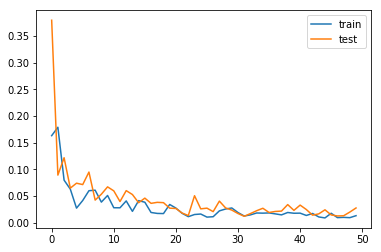

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 10s - loss: 0.2185 - val_loss: 0.3487
Epoch 2/50
 - 2s - loss: 0.1530 - val_loss: 0.0692
Epoch 3/50
 - 2s - loss: 0.0650 - val_loss: 0.0722
Epoch 4/50
 - 2s - loss: 0.0357 - val_loss: 0.0562
Epoch 5/50
 - 2s - loss: 0.0324 - val_loss: 0.0525
Epoch 6/50
 - 2s - loss: 0.0320 - val_loss: 0.0391
Epoch 7/50
 - 2s - loss: 0.0245 - val_loss: 0.0301
Epoch 8/50
 - 2s - loss: 0.0254 - val_loss: 0.0301
Epoch 9/50
 - 2s - loss: 0.0258 - val_loss: 0.0638
Epoch 10/50
 - 2s - loss: 0.0477 - val_loss: 0.0526
Epoch 11/50
 - 2s - loss: 0.0505 - val_loss: 0.0810
Epoch 12/50
 - 2s - loss: 0.0407 - val_loss: 0.0339
Epoch 13/50
 - 2s - loss: 0.0309 - val_loss: 0.0806
Epoch 14/50
 - 2s - loss: 0.0406 - val_loss: 0.0358
Epoch 15/50
 - 2s - loss: 0.0268 - val_loss: 0.0272
Epoch 16/50
 - 2s - loss: 0.0197 - val_loss: 0.0341
Epoch 17/50
 - 2s - loss: 0.0178 - val_loss: 0.0201
Epoch 18/50
 - 2s - loss: 0.0161 - val_loss: 0.0406
Epoch 19/50
 - 2s - loss

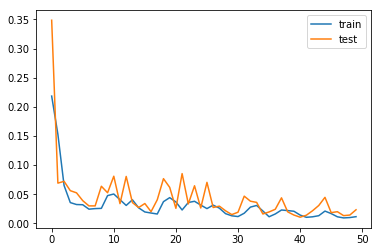

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 10s - loss: 0.1325 - val_loss: 0.2365
Epoch 2/50
 - 2s - loss: 0.1302 - val_loss: 0.0652
Epoch 3/50
 - 2s - loss: 0.0519 - val_loss: 0.0911
Epoch 4/50
 - 2s - loss: 0.0428 - val_loss: 0.0435
Epoch 5/50
 - 2s - loss: 0.0450 - val_loss: 0.0500
Epoch 6/50
 - 2s - loss: 0.0198 - val_loss: 0.0415
Epoch 7/50
 - 2s - loss: 0.0323 - val_loss: 0.0443
Epoch 8/50
 - 2s - loss: 0.0184 - val_loss: 0.0445
Epoch 9/50
 - 2s - loss: 0.0379 - val_loss: 0.0610
Epoch 10/50
 - 2s - loss: 0.0324 - val_loss: 0.0400
Epoch 11/50
 - 2s - loss: 0.0323 - val_loss: 0.0311
Epoch 12/50
 - 2s - loss: 0.0190 - val_loss: 0.0289
Epoch 13/50
 - 2s - loss: 0.0200 - val_loss: 0.0310
Epoch 14/50
 - 2s - loss: 0.0155 - val_loss: 0.0275
Epoch 15/50
 - 2s - loss: 0.0145 - val_loss: 0.0247
Epoch 16/50
 - 2s - loss: 0.0212 - val_loss: 0.0495
Epoch 17/50
 - 2s - loss: 0.0446 - val_loss: 0.0763
Epoch 18/50
 - 2s - loss: 0.0462 - val_loss: 0.0649
Epoch 19/50
 - 2s - loss

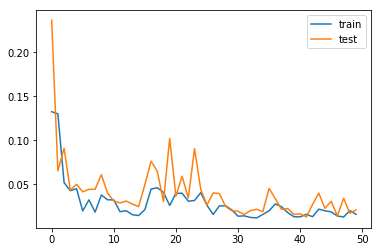

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 10s - loss: 0.2362 - val_loss: 0.2781
Epoch 2/50
 - 2s - loss: 0.1469 - val_loss: 0.1156
Epoch 3/50
 - 2s - loss: 0.0868 - val_loss: 0.1292
Epoch 4/50
 - 2s - loss: 0.0640 - val_loss: 0.0657
Epoch 5/50
 - 2s - loss: 0.0541 - val_loss: 0.0589
Epoch 6/50
 - 2s - loss: 0.0700 - val_loss: 0.1229
Epoch 7/50
 - 2s - loss: 0.0671 - val_loss: 0.0622
Epoch 8/50
 - 2s - loss: 0.0421 - val_loss: 0.0617
Epoch 9/50
 - 2s - loss: 0.0690 - val_loss: 0.1284
Epoch 10/50
 - 2s - loss: 0.0550 - val_loss: 0.0556
Epoch 11/50
 - 2s - loss: 0.0407 - val_loss: 0.0675
Epoch 12/50
 - 2s - loss: 0.0663 - val_loss: 0.1080
Epoch 13/50
 - 2s - loss: 0.0446 - val_loss: 0.0544
Epoch 14/50
 - 2s - loss: 0.0342 - val_loss: 0.0661
Epoch 15/50
 - 2s - loss: 0.0578 - val_loss: 0.0814
Epoch 16/50
 - 2s - loss: 0.0310 - val_loss: 0.0514
Epoch 17/50
 - 2s - loss: 0.0296 - val_loss: 0.0499
Epoch 18/50
 - 2s - loss: 0.0475 - val_loss: 0.0762
Epoch 19/50
 - 2s - loss

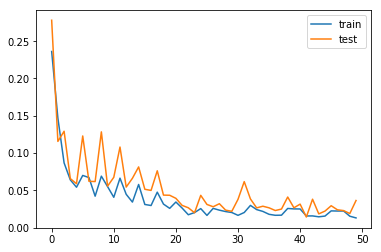

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 10s - loss: 0.1853 - val_loss: 0.3522
Epoch 2/50
 - 2s - loss: 0.1761 - val_loss: 0.1159
Epoch 3/50
 - 2s - loss: 0.0880 - val_loss: 0.1291
Epoch 4/50
 - 2s - loss: 0.0608 - val_loss: 0.0585
Epoch 5/50
 - 2s - loss: 0.0363 - val_loss: 0.0609
Epoch 6/50
 - 2s - loss: 0.0529 - val_loss: 0.0625
Epoch 7/50
 - 2s - loss: 0.0361 - val_loss: 0.0487
Epoch 8/50
 - 2s - loss: 0.0388 - val_loss: 0.0685
Epoch 9/50
 - 2s - loss: 0.0404 - val_loss: 0.0560
Epoch 10/50
 - 2s - loss: 0.0303 - val_loss: 0.0921
Epoch 11/50
 - 2s - loss: 0.0296 - val_loss: 0.0449
Epoch 12/50
 - 2s - loss: 0.0471 - val_loss: 0.0500
Epoch 13/50
 - 2s - loss: 0.0494 - val_loss: 0.0810
Epoch 14/50
 - 2s - loss: 0.0314 - val_loss: 0.0394
Epoch 15/50
 - 2s - loss: 0.0246 - val_loss: 0.0381
Epoch 16/50
 - 2s - loss: 0.0253 - val_loss: 0.0361
Epoch 17/50
 - 2s - loss: 0.0233 - val_loss: 0.0345
Epoch 18/50
 - 2s - loss: 0.0252 - val_loss: 0.0329
Epoch 19/50
 - 2s - loss

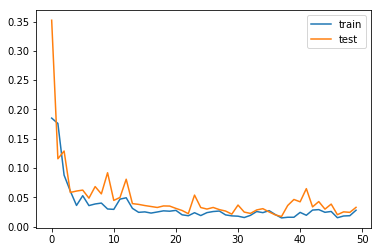

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 10s - loss: 0.1828 - val_loss: 0.3264
Epoch 2/50
 - 2s - loss: 0.1881 - val_loss: 0.0950
Epoch 3/50
 - 2s - loss: 0.0942 - val_loss: 0.1512
Epoch 4/50
 - 2s - loss: 0.1071 - val_loss: 0.0615
Epoch 5/50
 - 2s - loss: 0.0555 - val_loss: 0.0505
Epoch 6/50
 - 2s - loss: 0.0344 - val_loss: 0.0646
Epoch 7/50
 - 2s - loss: 0.0273 - val_loss: 0.0402
Epoch 8/50
 - 2s - loss: 0.0243 - val_loss: 0.0484
Epoch 9/50
 - 2s - loss: 0.0398 - val_loss: 0.0500
Epoch 10/50
 - 2s - loss: 0.0303 - val_loss: 0.0372
Epoch 11/50
 - 2s - loss: 0.0284 - val_loss: 0.0565
Epoch 12/50
 - 2s - loss: 0.0251 - val_loss: 0.0333
Epoch 13/50
 - 2s - loss: 0.0239 - val_loss: 0.0620
Epoch 14/50
 - 2s - loss: 0.0388 - val_loss: 0.0361
Epoch 15/50
 - 2s - loss: 0.0354 - val_loss: 0.0310
Epoch 16/50
 - 2s - loss: 0.0237 - val_loss: 0.0276
Epoch 17/50
 - 2s - loss: 0.0182 - val_loss: 0.0212
Epoch 18/50
 - 2s - loss: 0.0164 - val_loss: 0.0243
Epoch 19/50
 - 2s - loss

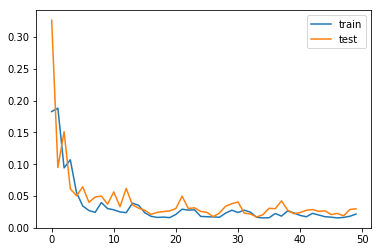

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 10s - loss: 0.1697 - val_loss: 0.3635
Epoch 2/50
 - 2s - loss: 0.1745 - val_loss: 0.0747
Epoch 3/50
 - 2s - loss: 0.0768 - val_loss: 0.1216
Epoch 4/50
 - 2s - loss: 0.0629 - val_loss: 0.0539
Epoch 5/50
 - 2s - loss: 0.0401 - val_loss: 0.0799
Epoch 6/50
 - 2s - loss: 0.0535 - val_loss: 0.0677
Epoch 7/50
 - 2s - loss: 0.0392 - val_loss: 0.0486
Epoch 8/50
 - 2s - loss: 0.0258 - val_loss: 0.0502
Epoch 9/50
 - 2s - loss: 0.0264 - val_loss: 0.0425
Epoch 10/50
 - 2s - loss: 0.0247 - val_loss: 0.0436
Epoch 11/50
 - 2s - loss: 0.0282 - val_loss: 0.0412
Epoch 12/50
 - 2s - loss: 0.0261 - val_loss: 0.0426
Epoch 13/50
 - 2s - loss: 0.0272 - val_loss: 0.0373
Epoch 14/50
 - 2s - loss: 0.0257 - val_loss: 0.0465
Epoch 15/50
 - 2s - loss: 0.0267 - val_loss: 0.0368
Epoch 16/50
 - 2s - loss: 0.0276 - val_loss: 0.0387
Epoch 17/50
 - 2s - loss: 0.0258 - val_loss: 0.0347
Epoch 18/50
 - 2s - loss: 0.0248 - val_loss: 0.0465
Epoch 19/50
 - 2s - loss

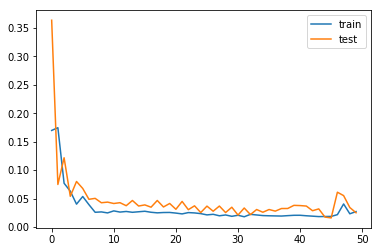

Train on 1348 samples, validate on 7539 samples
Epoch 1/50
 - 11s - loss: 0.1395 - val_loss: 0.2301
Epoch 2/50
 - 2s - loss: 0.1160 - val_loss: 0.0680
Epoch 3/50
 - 2s - loss: 0.0518 - val_loss: 0.1433
Epoch 4/50
 - 2s - loss: 0.0547 - val_loss: 0.0615
Epoch 5/50
 - 2s - loss: 0.0766 - val_loss: 0.1491
Epoch 6/50
 - 2s - loss: 0.0734 - val_loss: 0.0531
Epoch 7/50
 - 2s - loss: 0.0443 - val_loss: 0.0740
Epoch 8/50
 - 2s - loss: 0.0587 - val_loss: 0.0798
Epoch 9/50
 - 2s - loss: 0.0384 - val_loss: 0.0507
Epoch 10/50
 - 2s - loss: 0.0290 - val_loss: 0.0486
Epoch 11/50
 - 2s - loss: 0.0324 - val_loss: 0.0495
Epoch 12/50
 - 2s - loss: 0.0328 - val_loss: 0.0435
Epoch 13/50
 - 2s - loss: 0.0290 - val_loss: 0.0372
Epoch 14/50
 - 2s - loss: 0.0212 - val_loss: 0.0420
Epoch 15/50
 - 2s - loss: 0.0207 - val_loss: 0.0447
Epoch 16/50
 - 2s - loss: 0.0209 - val_loss: 0.0473
Epoch 17/50
 - 2s - loss: 0.0208 - val_loss: 0.0369
Epoch 18/50
 - 2s - loss: 0.0285 - val_loss: 0.0432
Epoch 19/50
 - 2s - loss

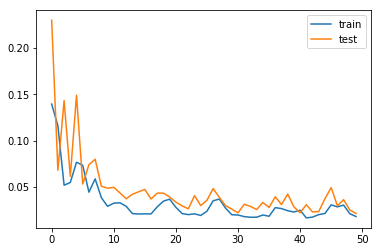

In [248]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import warnings
warnings.filterwarnings("ignore")
# design network
models = []
for i in range(10):
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    models.append(model)
for j in range(10):
    # fit network
    history = models[j].fit(train_X, outs[j][0], epochs=50, batch_size=72, validation_data=(test_X, outs[j][1]), verbose=2, shuffle=False);
    # plot history
    pyplot.plot(history.history['loss'], label='train');
    pyplot.plot(history.history['val_loss'], label='test');
    pyplot.legend();
    pyplot.show()

In [271]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# save the model to disk
Sum=0

for i in range(10):
    models[i].save(str(5*(i+1))+'finalized_model.model')
    # make a prediction
    yhat = models[i].predict(test_X)
    
    reshaped_test_X = test_X.reshape((test_X.shape[0], n_5mins*n_features))
    
    # invert scaling for forecast
    #inv_yhat = concatenate((yhat, reshaped_test_X[:, -7:]), axis=1)
    #inv_yhat = scaler.inverse_transform(inv_yhat)
    #inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    #test_y = outs[i][1].reshape((len(outs[i][1]), 1))
    #inv_y = concatenate((test_y, reshaped_test_X[:, -7:]), axis=1)
    #inv_y = scaler.inverse_transform(inv_y)
    #inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(outs[i][1], yhat))
    print('RMSE of final prices model for '+str(5*(i+1))+' minutes later: %.3f'%rmse) 
    Sum+=rmse
    #clfreg = LinearRegression()
    #clfreg1 = LinearRegression()
    #clfreg.fit(reshaped_test_X[:,-3], inv_y)
    #y_pred=clfreg.predict(reshaped_test_X[:,-3])
    #clfreg1.fit(reshaped_test_X[:,-3], inv_yhat)
    #y_pred1=clfreg1.predict(reshaped_test_X[:,-3])
    #plt.plot(reshaped_test_X[:,-3], y_pred , 'c',label='original price')
    #plt.plot(reshaped_test_X[:,-3],y_pred1 , 'r',label='predicted price')
    #plt.xlabel('Area');
    #plt.ylabel('Price');
    #pyplot.legend();
    #plt.show();
print('Total RMSE of final prices models: %.3f'%(Sum/10))  


RMSE of final prices model for 5 minutes later: 0.024
RMSE of final prices model for 10 minutes later: 0.027
RMSE of final prices model for 15 minutes later: 0.033
RMSE of final prices model for 20 minutes later: 0.028
RMSE of final prices model for 25 minutes later: 0.028
RMSE of final prices model for 30 minutes later: 0.048
RMSE of final prices model for 35 minutes later: 0.046
RMSE of final prices model for 40 minutes later: 0.039
RMSE of final prices model for 45 minutes later: 0.035
RMSE of final prices model for 50 minutes later: 0.030
Total RMSE of final prices models: 0.034


In [250]:
#print(test_X[:,5])
mape = (abs(outs[0][1]-yhat)/outs[0][1]).mean()
a = test_y
b= a[a==0]
#print(b)
print(mape)
#print(outs[0][1])
#print(yhat)

inf
